In [11]:
from main import * 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
conn, cur= connect_to_database()
latitude, longitude= get_latitude_longitude(cur, 'US LGB')
ships_in_vicinity_df = get_ships_in_vicinity(cur, latitude, longitude, width= 0.035866, height=0.043723 )
close_database(conn, cur)

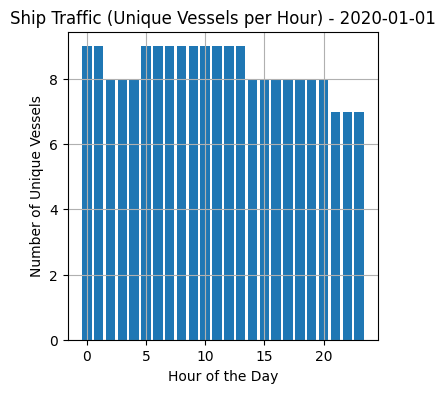

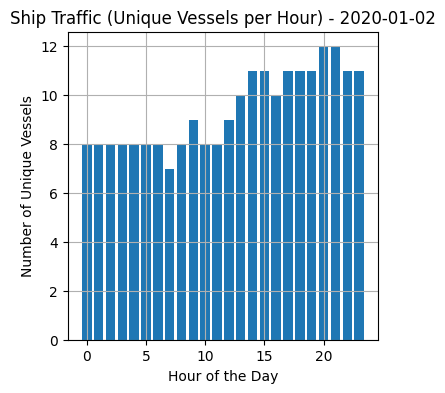

In [23]:
# Group data by date
ships_in_vicinity_df['date']= ships_in_vicinity_df['datetime'].dt.date
ships_in_vicinity_df['hour']= ships_in_vicinity_df['datetime'].dt.hour
grouped_by_date = ships_in_vicinity_df.groupby('date')

# Iterate over each date group
for date, group_df in grouped_by_date:
  # Count unique vessel names per hour
  vessel_counts_per_hour = group_df.groupby(['hour'])['vessel_name'].nunique()
  # Prepare plot
  plt.figure(figsize=(4, 4))  
  plt.bar(vessel_counts_per_hour.index, vessel_counts_per_hour.values)
  plt.xlabel('Hour of the Day')
  plt.ylabel('Number of Unique Vessels')
  plt.title(f'Ship Traffic (Unique Vessels per Hour) - {date}')
  plt.grid(True)

  # Display plot
  plt.show()

Observations:
- Traffic peaks between 12 and 8 PM, usually although there is no significant variance.
- Although there is a 70% rise in the traffic from the 1st of January, 2020 to the 2nd of January, 2020, it is a rise from 10 vessels to 17 in absolute terms. It cannot be determined without additional data regarding the daily influx of vessels in the port if this is a significant spike or not. 
- If we assume that there is a spike in the incoming vessels, these could be the reasons:
    - 1st of January is a public holiday and could be a reason for fewer vessels entering the port.
    - There may have been delays on the 1st of January due to poor weather conditions causing vessels to arrive on 2nd January instead.